# Can a machine predict a person's gender based on their tweet?

Steps:
1. Pull twitter data 
2. Store into dataframe
3. Classify male/female
4. Run model
5. Test with real tweet

In [90]:
import numpy as np
import pandas as pd
import tweepy as tw
import json
import pprint

In [91]:
path_auth = '/Users/allenj/Documents/Keys/auth_twitter.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)

my_consumer_key = auth['my_consumer_key']
my_consumer_secret = auth['my_consumer_secret']
my_access_token = auth['your_access_token']
my_access_token_secret = auth['my_access_token_secret']

In [92]:
auth = tw.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tw.API(auth)

In [93]:
type(api)

tweepy.api.API

In [94]:
# Get tweets
tweets = api.user_timeline(screen_name="HillaryClinton", count=5, include_rts=False)
for tweet in tweets:
    print(tweet.text)

Both vulnerable communities and those in positions of power are indebted to the activists who push for progress. La… https://t.co/a1acpcEiin
We can protect public health and our democracy. 

We'll do it by filing lawsuits now to expand and safeguard vote b… https://t.co/2dRd3hu5bK
Voting by mail has long been the norm in states like Oregon, Washington, &amp; Utah. It's easy and secure. 

Trump hims… https://t.co/D5GmENkroI
1. Provide free or prepaid postage so no one has to pay to vote.

2. Count ballots postmarked on or before Election… https://t.co/AsZesb80Ex
We have the data to guide us not only to implement voting by mail, but to make it secure and effective.

It comes d… https://t.co/MAgCyvT5Mv


In [95]:
tweets = api.user_timeline(screen_name="BarackObama", count=5, include_rts=False)
for tweet in tweets:
    print(tweet.text)

If you believe in a more just, more generous, more democratic America, now is the time to fight for it. Here’s a te… https://t.co/wjDlgys1Uc
On Memorial Day, we honor those who gave all for us. That takes different forms this year, but it’s even more vital… https://t.co/wUBXJWWoKs
And here’s more on the approach Sweden has taken, which differs from some of its neighbors: 

https://t.co/Qw5R0O5RhM
South Korea has focused on testing to guard against outbreaks:

https://t.co/51h11Pb3HZ
As all 50 states begin the process of reopening, here are three articles that offer some lessons from other countri… https://t.co/k6xeoaH9zm


In [62]:
# Define search term
search_words = "#wildfires"
date_since = "2018-11-16"

# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)
tweets

In [63]:
# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

RT @Univ_inenglish: The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican author…
Looking for family projects as you #StayAtHome? Here are 30 #EmergencyPreparedness tips for #hurricanes, #tornadoes… https://t.co/4hOHdo2OL2
The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican au… https://t.co/2DNIbzQrk6
RT @tamraraven: #10km3x2 #COVID19 DEAD 100,000 #exponentialGROWTH #K12 #climateChange #wildfires destroyslocal #biodiversity YOU #WorkFromH…
#10km3x2 #COVID19 DEAD 100,000 #exponentialGROWTH #K12 #climateChange #wildfires destroyslocal #biodiversity YOU… https://t.co/TeMQIwnpP1


In [65]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(5)

# Collect a list of tweets
[tweet.text for tweet in tweets]

['RT @Univ_inenglish: The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican author…',
 'Looking for family projects as you #StayAtHome? Here are 30 #EmergencyPreparedness tips for #hurricanes, #tornadoes… https://t.co/4hOHdo2OL2',
 'The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican au… https://t.co/2DNIbzQrk6',
 'RT @tamraraven: #10km3x2 #COVID19 DEAD 100,000 #exponentialGROWTH #K12 #climateChange #wildfires destroyslocal #biodiversity YOU #WorkFromH…',
 '#10km3x2 #COVID19 DEAD 100,000 #exponentialGROWTH #K12 #climateChange #wildfires destroyslocal #biodiversity YOU… https://t.co/TeMQIwnpP1']

In [80]:
# Collect into dataframe
tweets = tw.Cursor(api.search, 
                           q=search_words,
                           lang="en",
                           since=date_since).items(5)

users_text = [[tweet.user.screen_name, tweet.text] for tweet in tweets]
users_text

[['AntheralHazel',
  'RT @Univ_inenglish: The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican author…'],
 ['El_Universal_Mx',
  'RT @Univ_inenglish: The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican author…'],
 ['cassandra17lina',
  'Looking for family projects as you #StayAtHome? Here are 30 #EmergencyPreparedness tips for #hurricanes, #tornadoes… https://t.co/4hOHdo2OL2'],
 ['Univ_inenglish',
  'The best way to fight a #fire is with prevention since 98% of them are caused by human activity. Today, #Mexican au… https://t.co/2DNIbzQrk6'],
 ['jc_james_clark',
  'RT @tamraraven: #10km3x2 #COVID19 DEAD 100,000 #exponentialGROWTH #K12 #climateChange #wildfires destroyslocal #biodiversity YOU #WorkFromH…']]

In [81]:
tweet_text = pd.DataFrame(data=users_text, 
                    columns=['user', "text"])
tweet_text

,user,text
0,AntheralHazel,RT @Univ_inenglish: The best way to fight a #f...
1,El_Universal_Mx,RT @Univ_inenglish: The best way to fight a #f...
2,cassandra17lina,Looking for family projects as you #StayAtHome...
3,Univ_inenglish,The best way to fight a #fire is with preventi...
4,jc_james_clark,"RT @tamraraven: #10km3x2 #COVID19 DEAD 100,000..."


In [73]:
# Now do it based off of users

In [79]:
# Collect tweets
tweets = api.user_timeline(screen_name="BarackObama", count=5, include_rts=False)
tweets

[Status(_api=<tweepy.api.API object at 0x120c8c590>, _json={'created_at': 'Wed May 27 15:00:15 +0000 2020', 'id': 1265659084524728321, 'id_str': '1265659084524728321', 'text': 'If you believe in a more just, more generous, more democratic America, now is the time to fight for it. Here’s a te… https://t.co/wjDlgys1Uc', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/wjDlgys1Uc', 'expanded_url': 'https://twitter.com/i/web/status/1265659084524728321', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 813286, 'id_str': '813286', 'name': 'Barack Obama', 'screen_name': 'BarackObama', 'location': 'Washington, DC', 'description': 'Dad, husband, Presi

In [77]:
# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

If you believe in a more just, more generous, more democratic America, now is the time to fight for it. Here’s a te… https://t.co/wjDlgys1Uc
On Memorial Day, we honor those who gave all for us. That takes different forms this year, but it’s even more vital… https://t.co/wUBXJWWoKs
And here’s more on the approach Sweden has taken, which differs from some of its neighbors: 

https://t.co/Qw5R0O5RhM
South Korea has focused on testing to guard against outbreaks:

https://t.co/51h11Pb3HZ
As all 50 states begin the process of reopening, here are three articles that offer some lessons from other countri… https://t.co/k6xeoaH9zm


In [78]:
# Collect a list of tweets
tweets = api.user_timeline(screen_name="BarackObama", count=5, include_rts=False)

[tweet.text for tweet in tweets]

['If you believe in a more just, more generous, more democratic America, now is the time to fight for it. Here’s a te… https://t.co/wjDlgys1Uc',
 'On Memorial Day, we honor those who gave all for us. That takes different forms this year, but it’s even more vital… https://t.co/wUBXJWWoKs',
 'And here’s more on the approach Sweden has taken, which differs from some of its neighbors: \n\nhttps://t.co/Qw5R0O5RhM',
 'South Korea has focused on testing to guard against outbreaks:\n\nhttps://t.co/51h11Pb3HZ',
 'As all 50 states begin the process of reopening, here are three articles that offer some lessons from other countri… https://t.co/k6xeoaH9zm']

In [5]:
tweets = api.user_timeline(screen_name="BarackObama", count=10, include_rts=False)
users_text = [[tweet.user.screen_name, tweet.text] for tweet in tweets]
tweet_text = pd.DataFrame(data=users_text, 
                    columns=['user', "text"])
tweet_text

,user,text
0,BarackObama,"If you believe in a more just, more generous, ..."
1,BarackObama,"On Memorial Day, we honor those who gave all f..."
2,BarackObama,And here’s more on the approach Sweden has tak...
3,BarackObama,South Korea has focused on testing to guard ag...
4,BarackObama,As all 50 states begin the process of reopenin...
5,BarackObama,The Class of 2020 is full of the leaders we ne...
6,BarackObama,"As Chicago navigates the health crisis, its re..."
7,BarackObama,"Congrats to the high school Class of 2020, as ..."
8,BarackObama,Congratulations to the HBCU Class of 2020! Mic...


In [135]:
# Screen names of most popular twitter accounts with gender
# 0 = male, 1 = female
users = [['jimmyfallon',0],
         ['shakira',1],
         ['ddlovato',1],
         ['britneyspears',1],
         ['narendramodi',0],
         ['selenagomez',1],
         ['jtimberlake',0],
         ['kimkardashian',1],
         ['arianagrande',1],
         ['realdonaldtrump',0],
         ['theellenshow',1],
         ['ladygaga',1],
         ['cristiano',0],
         ['taylorswift13',1],
         ['rihanna',1],
         ['katyperry',1],
         ['justinbieber',0],
         ['barackobama',0]]

In [146]:
# Convert user list into dataframe
users_df = pd.DataFrame(users, columns=["user", "gender"])
user_only = users_df["user"]
user_only

0         jimmyfallon
1             shakira
2            ddlovato
3       britneyspears
4        narendramodi
5         selenagomez
6         jtimberlake
7       kimkardashian
8        arianagrande
9     realdonaldtrump
10       theellenshow
11           ladygaga
12          cristiano
13      taylorswift13
14            rihanna
15          katyperry
16       justinbieber
17        barackobama
Name: user, dtype: object

In [153]:
for i in user_only: 

    tweets = api.user_timeline(screen_name=i, count=5, include_rts=False)
    users_text = [[tweet.user.screen_name, tweet.text] for tweet in tweets]
    tweet_text = pd.DataFrame(data=users_text, 
                    columns=['user', "text"])
tweet_text.head(10)

,user,text
0,BarackObama,"If you believe in a more just, more generous, ..."
1,BarackObama,"On Memorial Day, we honor those who gave all f..."
2,BarackObama,And here’s more on the approach Sweden has tak...
3,BarackObama,South Korea has focused on testing to guard ag...
4,BarackObama,As all 50 states begin the process of reopenin...


In [182]:
list = []

for i in user_only: 
    tweets = api.user_timeline(screen_name=i, count=100, include_rts=False)
    users_text = [[tweet.user.screen_name, tweet.text] for tweet in tweets]
    tweet_text = pd.DataFrame(data=users_text, 
                        columns=['user', "text"])
    list.append(tweet_text)

list

[           user                                               text
 0   jimmyfallon  In 2000, while on SNL, I made a terrible decis...
 1   jimmyfallon  “Dancing With Myself” ft. @theroots, @BillyIdo...
 2   jimmyfallon  I’ve always felt like Tom Brady and I had a lo...
 3   jimmyfallon                      Nice. https://t.co/LKspW4wxsk
 4   jimmyfallon  I have to retweet just to have this on my time...
 ..          ...                                                ...
 83  jimmyfallon  The Tonight Show: At Home Edition (@jonasbroth...
 84  jimmyfallon  Got a pet? Then #PetDuet. @charlidamelio and I...
 85  jimmyfallon  Did you know @SIRIUSXM is free until May 15th?...
 86  jimmyfallon  The Tonight Show: At Home Edition (@AROD, @rhe...
 87  jimmyfallon  We are playing quarantined HOT ONES tonight wi...
 
 [88 rows x 2 columns],
        user                                               text
 0   shakira                          @isamebarak Y yo a ti!!!😘
 1   shakira  Congratulations 

In [183]:
merged = pd.concat(list)
merged

,user,text
0,jimmyfallon,"In 2000, while on SNL, I made a terrible decis..."
1,jimmyfallon,"“Dancing With Myself” ft. @theroots, @BillyIdo..."
2,jimmyfallon,I’ve always felt like Tom Brady and I had a lo...
3,jimmyfallon,Nice. https://t.co/LKspW4wxsk
4,jimmyfallon,I have to retweet just to have this on my time...
...,...,...
91,BarackObama,"Every so often, I re-read Dr. King’s Letter fr..."
92,BarackObama,"In every scene, you are my star, @MichelleObam..."
93,BarackObama,Glad to see American Factory’s Oscar nod for B...
94,BarackObama,Our fellow Americans in Puerto Rico can use ou...


In [184]:
merged.to_csv(r'../Data/tweets.csv')

In [336]:
tweets2 = pd.read_csv('../Data/tweets2.csv')
tweets2.head(100)

,user,gender,text
0,jimmyfallon,0,"In 2000, while on SNL, I made a terrible decis..."
1,jimmyfallon,0,"“Dancing With Myself” ft. @theroots, @BillyIdo..."
2,jimmyfallon,0,I’ve always felt like Tom Brady and I had a lo...
3,jimmyfallon,0,Nice. https://t.co/LKspW4wxsk
4,jimmyfallon,0,I have to retweet just to have this on my time...
...,...,...,...
95,shakira,1,Who’s excited about Shak’s special guest appea...
96,shakira,1,Felicidades de nuestro equipo @fpiesdescalzos ...
97,shakira,1,Los maestros son los pilares de la sociedad. \...
98,shakira,1,Mustered up the strength to put on some makeup...


In [337]:
tweets2.groupby(["user", "gender"]).size()

user             gender
ArianaGrande     1          55
BarackObama      0          96
Cristiano        0         100
KimKardashian    1          77
TheEllenShow     1          97
britneyspears    1          85
ddlovato         1          50
jimmyfallon      0          88
jtimberlake      0          45
justinbieber     0          83
katyperry        1         100
ladygaga         1          83
narendramodi     0         100
realDonaldTrump  0          61
rihanna          1          98
selenagomez      1          70
shakira          1          57
taylorswift13    1          95
dtype: int64

In [338]:
tw = tweets2
tw

,user,gender,text
0,jimmyfallon,0,"In 2000, while on SNL, I made a terrible decis..."
1,jimmyfallon,0,"“Dancing With Myself” ft. @theroots, @BillyIdo..."
2,jimmyfallon,0,I’ve always felt like Tom Brady and I had a lo...
3,jimmyfallon,0,Nice. https://t.co/LKspW4wxsk
4,jimmyfallon,0,I have to retweet just to have this on my time...
...,...,...,...
1435,BarackObama,0,"Every so often, I re-read Dr. King’s Letter fr..."
1436,BarackObama,0,"In every scene, you are my star, @MichelleObam..."
1437,BarackObama,0,Glad to see American Factory’s Oscar nod for B...
1438,BarackObama,0,Our fellow Americans in Puerto Rico can use ou...


# Prepare the text

In [339]:
# Clean the text
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

#Remove @ symbol
tw['clean_text'] = np.vectorize(remove_pattern)(tw['text'], "@[\w]*")
tw['clean_text'] = np.vectorize(remove_pattern)(tw['text'], "htt*")
tw.head()

,user,gender,text,clean_text
0,jimmyfallon,0,"In 2000, while on SNL, I made a terrible decis...","In 2000, while on SNL, I made a terrible decis..."
1,jimmyfallon,0,"“Dancing With Myself” ft. @theroots, @BillyIdo...","“Dancing With Myself” ft. @theroots, @BillyIdo..."
2,jimmyfallon,0,I’ve always felt like Tom Brady and I had a lo...,I’ve always felt like Tom Brady and I had a lo...
3,jimmyfallon,0,Nice. https://t.co/LKspW4wxsk,Nice. ps://t.co/LKspW4wxsk
4,jimmyfallon,0,I have to retweet just to have this on my time...,I have to retweet just to have this on my time...


In [340]:
# Remove punctuation, numbers, and special characters
tw['clean_text'] = tw['clean_text'].str.replace("[^a-zA-Z#]", " ")
tw.head(10)

,user,gender,text,clean_text
0,jimmyfallon,0,"In 2000, while on SNL, I made a terrible decis...",In while on SNL I made a terrible decis...
1,jimmyfallon,0,"“Dancing With Myself” ft. @theroots, @BillyIdo...",Dancing With Myself ft theroots BillyIdo...
2,jimmyfallon,0,I’ve always felt like Tom Brady and I had a lo...,I ve always felt like Tom Brady and I had a lo...
3,jimmyfallon,0,Nice. https://t.co/LKspW4wxsk,Nice ps t co LKspW wxsk
4,jimmyfallon,0,I have to retweet just to have this on my time...,I have to retweet just to have this on my time...
5,jimmyfallon,0,One of the best father/son life lessons I’ve e...,One of the best father son life lessons I ve e...
6,jimmyfallon,0,I’m taking my chance. Would you like to dance?...,I m taking my chance Would you like to dance ...
7,jimmyfallon,0,@questlove Ha haaaa you kept having him play. ...,questlove Ha haaaa you kept having him play ...
8,jimmyfallon,0,"The Tonight Show: At Home Edition (@BillyIdol,...",The Tonig Show At Home Edition BillyIdol ...
9,jimmyfallon,0,It’s @BillyIdol !!! And @TheRoots !! Dancing W...,It s BillyIdol And TheRoots Dancing W...


In [341]:
# Remove short words less than 2
tw['clean_text'] = tw['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tw.head(10)

,user,gender,text,clean_text
0,jimmyfallon,0,"In 2000, while on SNL, I made a terrible decis...",while made terrible decision impersonation Chr...
1,jimmyfallon,0,"“Dancing With Myself” ft. @theroots, @BillyIdo...",Dancing With Myself theroots BillyIdol home
2,jimmyfallon,0,I’ve always felt like Tom Brady and I had a lo...,always felt like Brady common after watching g...
3,jimmyfallon,0,Nice. https://t.co/LKspW4wxsk,Nice LKspW wxsk
4,jimmyfallon,0,I have to retweet just to have this on my time...,have retweet just have this timeline love Bill...
5,jimmyfallon,0,One of the best father/son life lessons I’ve e...,best father life lessons ever heard RedHourBen...
6,jimmyfallon,0,I’m taking my chance. Would you like to dance?...,taking chance Would like dance #QuaranTune #Da...
7,jimmyfallon,0,@questlove Ha haaaa you kept having him play. ...,questlove haaaa kept having play That funny mo...
8,jimmyfallon,0,"The Tonight Show: At Home Edition (@BillyIdol,...",Tonig Show Home Edition BillyIdol SofiaVergara...
9,jimmyfallon,0,It’s @BillyIdol !!! And @TheRoots !! Dancing W...,BillyIdol TheRoots Dancing With Myself Stay mi...


In [342]:
# Tokenization
tokenized_tweet = tw['clean_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [while, made, terrible, decision, impersonatio...
1    [Dancing, With, Myself, theroots, BillyIdol, h...
2    [always, felt, like, Brady, common, after, wat...
3                                  [Nice, LKspW, wxsk]
4    [have, retweet, just, have, this, timeline, lo...
Name: clean_text, dtype: object

In [343]:
import nltk
from nltk import PorterStemmer

In [344]:
# Stemming
ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [while, made, terribl, decis, imperson, chri, ...
1       [danc, with, myself, theroot, billyidol, home]
2    [alway, felt, like, bradi, common, after, watc...
3                                  [nice, lkspw, wxsk]
4    [have, retweet, just, have, thi, timelin, love...
Name: clean_text, dtype: object

In [345]:
# Stich tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tw['clean_text'] = tokenized_tweet
tw.head(10)

,user,gender,text,clean_text
0,jimmyfallon,0,"In 2000, while on SNL, I made a terrible decis...",while made terribl decis imperson chri rock wh...
1,jimmyfallon,0,"“Dancing With Myself” ft. @theroots, @BillyIdo...",danc with myself theroot billyidol home
2,jimmyfallon,0,I’ve always felt like Tom Brady and I had a lo...,alway felt like bradi common after watch golf ...
3,jimmyfallon,0,Nice. https://t.co/LKspW4wxsk,nice lkspw wxsk
4,jimmyfallon,0,I have to retweet just to have this on my time...,have retweet just have thi timelin love billi ...
5,jimmyfallon,0,One of the best father/son life lessons I’ve e...,best father life lesson ever heard redhourben ...
6,jimmyfallon,0,I’m taking my chance. Would you like to dance?...,take chanc would like danc #quarantun #dancing...
7,jimmyfallon,0,@questlove Ha haaaa you kept having him play. ...,questlov haaaa kept have play that funni more ...
8,jimmyfallon,0,"The Tonight Show: At Home Edition (@BillyIdol,...",tonig show home edit billyidol sofiavergara st...
9,jimmyfallon,0,It’s @BillyIdol !!! And @TheRoots !! Dancing W...,billyidol theroot danc with myself stay minut ...


In [346]:
# Word cloud
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [347]:
# Generate word cloud for males
male_words = ' '.join(text for text in tw['clean_text'][tw['gender']==0])

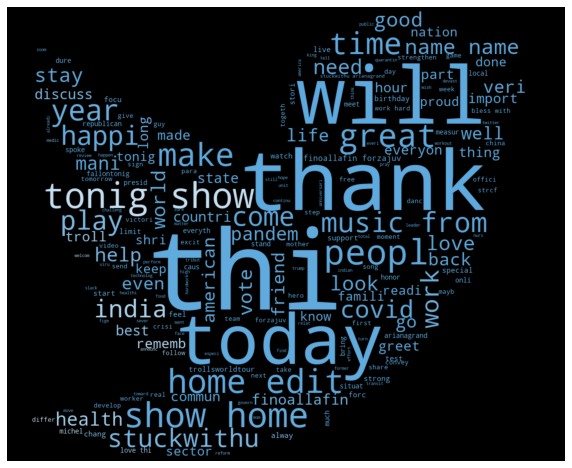

In [348]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(male_words)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [349]:
# Generate word cloud for females
female_words = ' '.join(text for text in tw['clean_text'][tw['gender']==1])

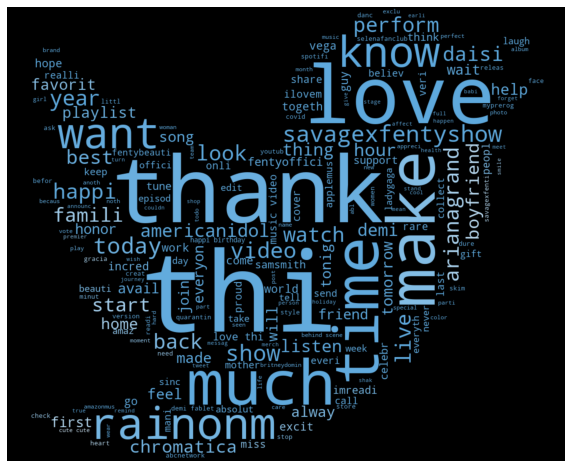

In [350]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(female_words)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [324]:
# Hashtags
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

# Hashtags from males
ht_male = Hashtags_Extract(tw['clean_text'][tw['gender']==0])
ht_male

[[],
 [],
 [],
 [],
 [],
 [],
 ['quarantun', 'dancingwithmyself'],
 [],
 [],
 ['nbc', 'fallon'],
 [],
 ['name'],
 [],
 [],
 [],
 ['name'],
 [],
 [],
 [],
 ['name'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['fallontonig'],
 [],
 ['name'],
 ['name'],
 [],
 ['fallonathom', 'quarantun'],
 [],
 [],
 ['firstthingimgoingtodowhenthisisov'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['webbi'],
 [],
 ['thankyounur', 'nursesday'],
 [],
 [],
 ['webbi'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['quarantinemomquot'],
 [],
 [],
 [],
 ['internationalfirefigersday'],
 [],
 [],
 ['fallontonig'],
 [],
 [],
 ['fallonathom', 'nbc'],
 [],
 [],
 [],
 [],
 [],
 ['fallontonig'],
 ['askthefallon'],
 [],
 [],
 [],
 ['quarantineabook'],
 [],
 [],
 [],
 [],
 [],
 ['petduet', 'fallonathom', 'distanc'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['mannkibaat'],
 []

In [326]:
ht_male_unnest = sum(ht_male,[])
ht_male_unnest

['quarantun',
 'dancingwithmyself',
 'nbc',
 'fallon',
 'name',
 'name',
 'name',
 'fallontonig',
 'name',
 'name',
 'fallonathom',
 'quarantun',
 'firstthingimgoingtodowhenthisisov',
 'webbi',
 'thankyounur',
 'nursesday',
 'webbi',
 'quarantinemomquot',
 'internationalfirefigersday',
 'fallontonig',
 'fallonathom',
 'nbc',
 'fallontonig',
 'askthefallon',
 'quarantineabook',
 'petduet',
 'fallonathom',
 'distanc',
 'mannkibaat',
 'aatmanirbharbharat',
 'aatmanirbharbharat',
 'aatmanirbharbharat',
 'ahmaudarberi',
 'trollsworldtour',
 'socialdistanc',
 'fbf',
 'name',
 'trollsworldtour',
 'trollsworldtour',
 'newmusicdaili',
 'trollsworldtour',
 'tinydiamond',
 'believechalleng',
 'trollsworldtour',
 'trollsworldtour',
 'trollsworldtour',
 'maga',
 'backontrack',
 'fit',
 'nutrit',
 'famili',
 'madeiraisland',
 'comebackstrong',
 'comebackstrong',
 'stayact',
 'stayact',
 'siiiimmmmm',
 'stayhom',
 'stayhomestaysaf',
 'stayhomesavel',
 'ucl',
 'forzajuv',
 'finoallafin',
 'forzajuv',


In [327]:
# Hashtags from females
ht_female = Hashtags_Extract(tw['clean_text'][tw['gender']==1])
ht_female

[[],
 [],
 [],
 [],
 [],
 [],
 ['thevoic'],
 ['thevoic'],
 [],
 [],
 ['smallvictori'],
 ['disneyfamilysingalong'],
 [],
 [],
 [],
 [],
 ['throwbackthursday'],
 ['tbt'],
 [],
 ['disneyfamilysingalong'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['tbt'],
 [],
 [],
 [],
 ['stayhom'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['globaleffort', 'stayhom'],
 [],
 [],
 ['megustavideo'],
 ['megustavideo'],
 [],
 [],
 [],
 ['megustavideo'],
 ['megustavideo'],
 ['allin'],
 ['demi'],
 [],
 ['dearclassof', 'withm'],
 [],
 ['ilovem'],
 [],
 ['demi'],
 [],
 [],
 ['ilovem'],
 ['listeningtogeth'],
 ['ilovem'],
 ['ilovem'],
 [],
 ['demi'],
 ['ilovem'],
 [],
 ['ilovem'],
 [],
 ['demi'],
 ['ilovem', 'imreadi'],
 [],
 ['imreadi'],
 ['imreadi'],
 ['thementalhealthfund'],
 ['imreadi'],
 ['imreadi'],
 ['imreadi'],
 ['imreadi'],
 ['imreadi', 'teamdemi', 'teamsam', 'samanddemi'],
 ['disneyfamilysingalong'],
 ['imreadi'],
 ['imreadi'],
 [],
 ['imreadi'],
 [],
 [],
 [],
 [],
 ['ilovem'

In [328]:
ht_female_unnest = sum(ht_female,[])
ht_female_unnest

['thevoic',
 'thevoic',
 'smallvictori',
 'disneyfamilysingalong',
 'throwbackthursday',
 'tbt',
 'disneyfamilysingalong',
 'tbt',
 'stayhom',
 'globaleffort',
 'stayhom',
 'megustavideo',
 'megustavideo',
 'megustavideo',
 'megustavideo',
 'allin',
 'demi',
 'dearclassof',
 'withm',
 'ilovem',
 'demi',
 'ilovem',
 'listeningtogeth',
 'ilovem',
 'ilovem',
 'demi',
 'ilovem',
 'ilovem',
 'demi',
 'ilovem',
 'imreadi',
 'imreadi',
 'imreadi',
 'thementalhealthfund',
 'imreadi',
 'imreadi',
 'imreadi',
 'imreadi',
 'imreadi',
 'teamdemi',
 'teamsam',
 'samanddemi',
 'disneyfamilysingalong',
 'imreadi',
 'imreadi',
 'imreadi',
 'ilovem',
 'ilovem',
 'worldhealthday',
 'ilovem',
 'demi',
 'demi',
 'fallonathom',
 'demi',
 'toxic',
 'myprerog',
 'britneydomin',
 'britneydomin',
 'myprerog',
 'babyonemoretim',
 'myprerog',
 'myprerog',
 'myprerog',
 'hillfir',
 'woolseyfir',
 'myprerog',
 'borderlin',
 'britneydomin',
 'britneydomin',
 'myprerog',
 'citipres',
 'britneydomin',
 'britneydomin'

In [360]:
# Counting the frequency of the words for males
word_freq_male = nltk.FreqDist(ht_male_unnest)
word_freq_male

FreqDist({'name': 28, 'stuckwithu': 22, 'finoallafin': 19, 'forzajuv': 13, 'trollsworldtour': 7, 'liveahead': 4, 'stuckwithumom': 4, 'fallontonig': 3, 'fallonathom': 3, 'aatmanirbharbharat': 3, ...})

In [359]:
# Create a dataframe for the most frequently used words in hashtags
df_male = pd.DataFrame(word_freq_male, columns=["hashtags", "count"])
df_male.head(10)

,hashtags,count


# Prepare the text

In [295]:
## Import Libraries
import pandas as pd

import regex as re
import spacy

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

In [212]:
nlp = spacy.load('en')

# Modeling

In [321]:
# Features and Labels
X = tw['clean_text']
y = tw['gender']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [308]:
# create a matrix of word counts from the text
counts = CountVectorizer()

In [309]:
# do the actual counting
A = counts.fit_transform(X_train, y_train)

In [310]:
# create a classifier using SVC
classifier = LinearSVC()

In [311]:
# train the classifier with the training data
classifier.fit(A.toarray(), y_train)

LinearSVC()

In [312]:
# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = counts.transform(X_test)

In [313]:
# make predictions based on the test data
predictions = classifier.predict(B)
predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1])

In [322]:
# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.6007


In [208]:
# helper function to show results and charts
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

Accuracy : 0.6007 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6650 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7278 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5583                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


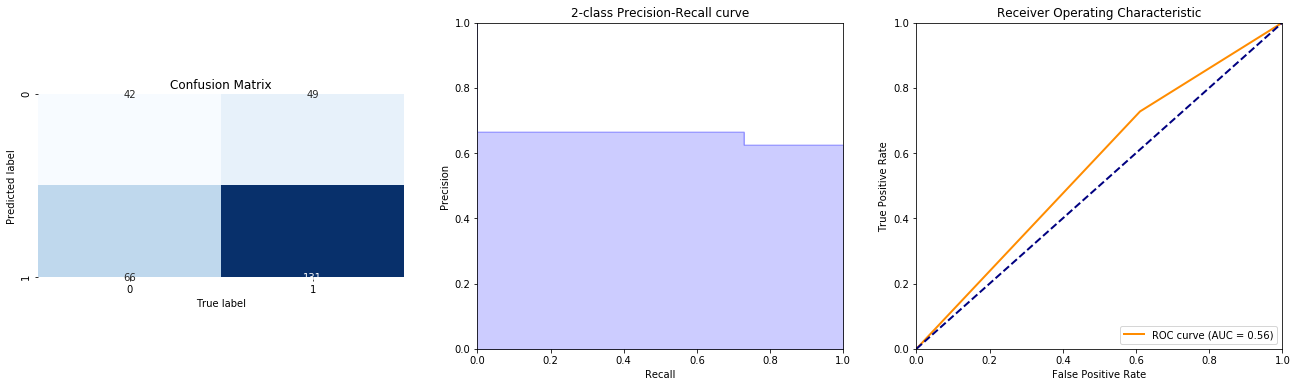

(0.6006944444444444,
 0.6649746192893401,
 0.7277777777777777,
 0.5583333333333333)

In [323]:
show_summary_report(y_test, predictions)